## Stage5 Titanic Data Analysis
dataset: Titanic Data

### Question: What factors made people more likely to survive?
=============
###### Factor1: Class
Passengers in upper class have higher chance to survive. The survival rate of assengers in Upper class(Class1) is 2.5 times higher than the rate of passengers in Lower class(Class3)

###### Factor2: Age
Babies and kids(aged from 0 to 10) have the highest survival rate, 0.59, followed by middle-aged group(aged from 30 to 40) with 0.44 survival rate.

###### Factor3: Gender
Female passengers have higher chance to survive. Female survival rate is 0.74, which is 3.9 times higher than the rate of male passengers. There is huge gender inequality of survival rate accross all age groups, except babies and kids(aged from 0 to 10).

While comparing the male fatalities by age, male in twenties and thirties accounts for the major fatalities in the sinking of Titanic. It might because male takes the major responsibility to rescue or be in charge of the functionality of Titanic and let kids or female to evacuate first.

###### Conclusion
Overall, if you are a kid living in upper class, you might have the best chance to evacuate and survive from Titanic tragedy.



## Python code

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
# Read Titanic data as Pandas dataframe and use .describe() & .head() & .dtypes to get the idea of the data 
file_name = 'titanic_data.csv'
titanic_df = pd.read_csv(file_name)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [285]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [286]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [287]:
'''Use Pandas .corr() to calculate the correlation coefficient of Survived with other factors. 
It helps me to get the idea on which factor I can look deeper.'''

titanic_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

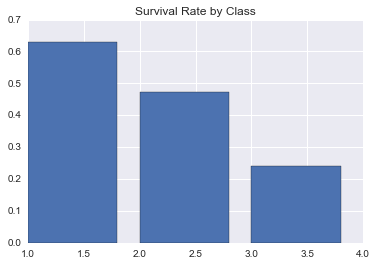

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64
Survival Rate(Class1 vs. Class3): 2.59788359788


In [288]:
# Look into survival rate by class

class_distribution = titanic_df.groupby('Pclass')['PassengerId'].count()
class_survived = titanic_df.groupby('Pclass')['Survived'].sum()
survived_rate_by_class = class_survived / class_distribution

plt.bar(survived_rate_by_class.index, survived_rate_by_class)
plt.title('Survival Rate by Class')
plt.show()

print survived_rate_by_class
print 'Survival Rate(Class1 vs. Class3):', survived_rate_by_class.loc[1]/survived_rate_by_class.loc[3]

People stay in Lower Class(class3) are the majority of those who did not survive(Historgram title with "0")


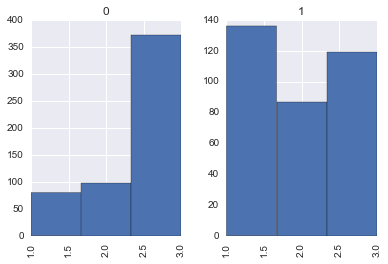

In [289]:
# Compare those who survived and those who didn't survive by class
titanic_df['Pclass'].hist(by= titanic_df['Survived'], bins=3)
print 'People stay in Lower Class(class3) are the majority of those who did not survive(Historgram title with "0")'

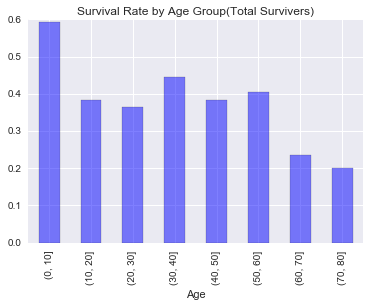

Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


In [296]:
# Survival rate by age group

bins = np.linspace(0, 80, num=9, dtype ='int16')
age_bin = pd.cut(titanic_df.Age, bins)
count_of_passenger_by_age = titanic_df.groupby(age_bin)['Survived'].count()
survived_passenger_by_age = titanic_df.groupby(age_bin)['Survived'].sum()
survival_rate_by_age = survived_passenger_by_age / count_of_passenger_by_age
survival_rate_by_age.plot.bar(alpha=0.5)
plt.title('Survival Rate by Age Group(Total Survivers)')
plt.show()
print survival_rate_by_age


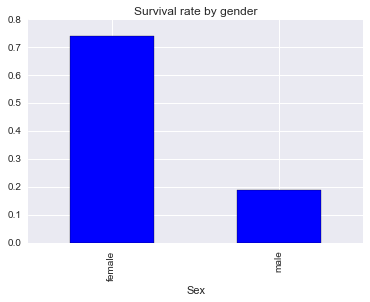

Female survival rate: 0.742038216561
Male survival rate: 0.188908145581
Survival rate(female vs male): 3.92803716473


In [302]:
# Survival rate by gender group
gender_distribution = titanic_df.groupby('Sex')['Survived'].count()
gender_survived = titanic_df.groupby('Sex')['Survived'].sum()
gender_survival_rate = gender_survived / gender_distribution
gender_survival_rate.plot.bar()
plt.title('Survival rate by gender')
plt.show()
print 'Female survival rate:', gender_survival_rate['female']
print 'Male survival rate:', gender_survival_rate['male']
print 'Survival rate(female vs male):', gender_survival_rate['female']/gender_survival_rate['male']


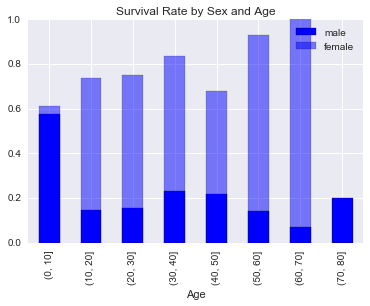

Age
(0, 10]     0.575758
(10, 20]    0.144928
(20, 30]    0.154362
(30, 40]    0.230000
(40, 50]    0.218182
(50, 60]    0.142857
(60, 70]    0.071429
(70, 80]    0.200000
Name: Survived, dtype: float64


In [313]:
# Compare survival rate by sex and age. There is gender inequality across all age groups, except the age group of 0-10.

age_bin = pd.cut(male_df.Age, bins)
c = male_df.groupby(age_bin)['Survived'].count()
s = male_df.groupby(age_bin)['Survived'].sum()
male_survival_rate = s/c
male_survival_rate.plot.bar(label= 'male')
female_survival_rate.plot.bar(alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.title('Survival Rate by Sex and Age')
plt.show()
print male_survival_rate


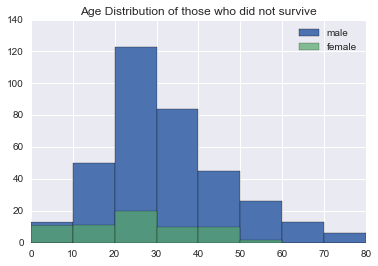

In [314]:
# Compare the age distribution of those who did not survive by sex

died_male_df = titanic_df.loc[(titanic_df['Sex']== 'male') & (titanic_df['Survived'] == 0)]
died_female_df = titanic_df.loc[(titanic_df['Sex']== 'female') & (titanic_df['Survived'] == 0)]

bins = np.linspace(0, 80, num=9)
plt.hist(died_male_df['Age'], bins, label='male')
plt.hist(died_female_df['Age'], bins, label='female', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Age Distribution of those who did not survive')
plt.show()

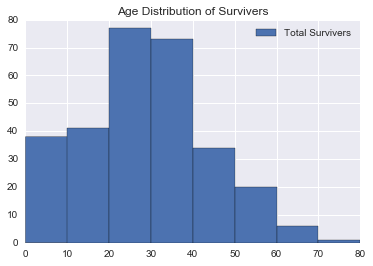

In [311]:
survived_df = titanic_df.loc[titanic_df['Survived'] == 1]
plt.hist(survived_df['Age'], bins, label='Total Survivers')
plt.legend(loc='upper right')
plt.title('Age Distribution of Survivers')
plt.show()